# Build and Evaluate a Logistic Regression Model

A logistic regression is a type of model which can be used when predicting a categorial outcome. Specifically, it outputs a predicted probability that an observation is in one class or the other.

In this notebook, you'll see how to build a logistic regression model to predict presence or absence of heart disease in a patient based on 13 characteristics.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from cm import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

In [2]:
brfss = pd.read_csv('../data/brfss.csv')

In [3]:
brfss.shape

(262049, 40)

In [4]:
brfss.head(2)

,GENHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,_RFHYPE5,TOLDHI2,CVDINFR4,CVDCRHD4,CVDSTRK3,...,EXERANY2,_METSTAT,_URBSTAT,_IMPRACE,_RFBMI5,_RFSMOK3,_RFBING5,_RFDRHV7,_TOTINDA,target
0,Good,Yes,"Yes, only one",No,Within past year (anytime less than 12 months ...,Yes,Yes,No,No,No,...,No,"Metropolitan counties (_URBNRRL = 1,2,3,4)","Urban counties (_URBNRRL = 1,2,3,4,5)","Black, Non-Hispanic",Yes,No,No,No,No physical activity or exercise in last 30 days,True
1,Fair,Yes,"Yes, only one",No,Within past year (anytime less than 12 months ...,No,No,No,No,No,...,Yes,"Metropolitan counties (_URBNRRL = 1,2,3,4)","Urban counties (_URBNRRL = 1,2,3,4,5)","White, Non-Hispanic",No,No,No,No,Had physical activity or exercise,True


In [5]:
#import pandas
import pandas as pd



# get the dummies and store it in a variable
dummies = pd.get_dummies(brfss.CHECKUP1)
#dummies

# Concatenate the dummies to original dataframe
merged = pd.concat([brfss, dummies], axis='columns')
#merged
# drop the values
#m1=merged.drop(['CHECKUP1','5 or more years ago','Within past 2 years (1 year but less than 2 years ago)'], axis='columns')

brfss1=merged.drop(['CHECKUP1'], axis='columns')
brfss1
# print the dataframe
#print(merged)


,GENHLTH,HLTHPLN1,PERSDOC2,MEDCOST,_RFHYPE5,TOLDHI2,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,...,_RFSMOK3,_RFBING5,_RFDRHV7,_TOTINDA,target,5 or more years ago,Never,Within past 2 years (1 year but less than 2 years ago),Within past 5 years (2 years but less than 5 years ago),Within past year (anytime less than 12 months ago)
0,Good,Yes,"Yes, only one",No,Yes,Yes,No,No,No,No,...,No,No,No,No physical activity or exercise in last 30 days,True,0,0,0,0,1
1,Fair,Yes,"Yes, only one",No,No,No,No,No,No,No,...,No,No,No,Had physical activity or exercise,True,0,0,0,0,1
2,Good,Yes,More than one,No,Yes,No,No,No,No,No,...,No,No,No,Had physical activity or exercise,True,0,0,0,0,1
3,Very good,Yes,"Yes, only one",No,No,No,No,No,No,Yes,...,Yes,No,No,Had physical activity or exercise,True,0,0,0,0,1
4,Poor,Yes,"Yes, only one",No,No,Yes,No,No,No,Yes,...,No,No,No,No physical activity or exercise in last 30 days,True,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262044,Good,Yes,"Yes, only one",No,No,No,No,Yes,No,No,...,No,No,No,No physical activity or exercise in last 30 days,True,0,0,0,0,1
262045,Very good,Yes,"Yes, only one",No,Yes,No,No,No,Yes,No,...,No,No,No,Had physical activity or exercise,True,0,0,0,0,1
262046,Good,No,"Yes, only one",Yes,No,No,No,No,No,No,...,Yes,No,No,Had physical activity or exercise,True,0,0,0,0,1
262047,Excellent,Yes,"Yes, only one",No,No,No,No,No,No,No,...,Yes,No,No,Had physical activity or exercise,True,0,0,0,0,1


In [7]:
### scikit learn likes data frame to be in double bracket
X = brfss1[['5 or more years ago']]                 # Predictor variable (as a DataFrame)
y = brfss1['HLTHPLN1']                   # Target

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify = y,     # Keep the same proportions of the target in the training and test data
                                                    test_size = 0.25,
                                                    random_state = 321)

In [9]:
X_test

,5 or more years ago
82487,0
86098,0
119475,0
198102,0
199179,0
...,...
167680,0
131976,0
72248,0
181602,0


In [10]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()         # Create a logistic regression model
logreg.fit(X_train, y_train)          # Fit it to the training data

LogisticRegression()

In [11]:
logreg.intercept_

array([2.76918922])

In [12]:
logreg.coef_

array([[-1.76268378]])

In [13]:
y_pred_prob = logreg.predict_proba(X_test)[:,1]
y_pred_prob


array([0.94098798, 0.94098798, 0.94098798, ..., 0.94098798, 0.94098798,
       0.94098798])

In [14]:
i = 10 ### row number

print('5 or more years ago:\n{}'.format(X_test.iloc[i]))
print('---------------------------------')
print('Predicted Probability of 5 or more years ago: {}'.format(y_pred_prob[i]))
print('Actual: {}'.format(y_test.iloc[i]))

5 or more years ago:
5 or more years ago    0
Name: 100136, dtype: uint8
---------------------------------
Predicted Probability of 5 or more years ago: 0.940987980149593
Actual: Yes


In [15]:
###brfss['MEDCOST'].value_counts()

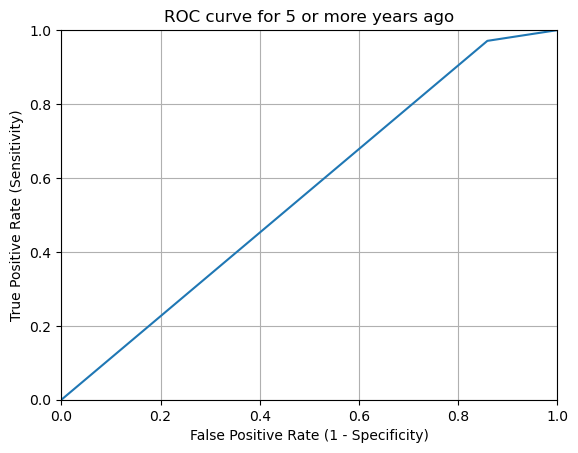

In [16]:
from sklearn.metrics import roc_auc_score, roc_curve
fp_rate, tp_rate, thresholds = roc_curve(y_test == 'Yes', y_pred_prob)

plt.plot(fp_rate, tp_rate)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for 5 or more years ago')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [17]:
roc_auc_score(y_test, y_pred_prob)

0.5560890689525693

In [18]:
from sklearn.metrics import confusion_matrix, classification_report
from cm import plot_confusion_matrix

In [19]:
y_pred = logreg.predict(X_test)

In [20]:
confusion_matrix(y_test, y_pred)

array([[    0,  4348],
       [    0, 61165]])

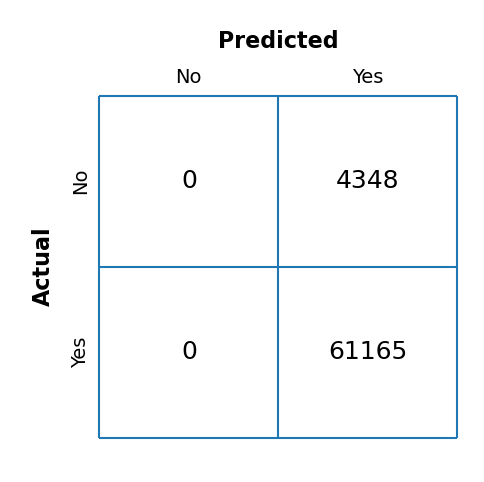

In [21]:
plot_confusion_matrix(y_test, y_pred, labels = ['No', 'Yes'])

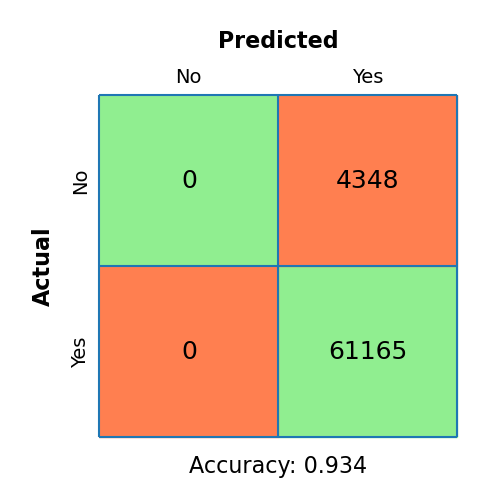

In [22]:
plot_confusion_matrix(y_test, y_pred, labels = ['No', 'Yes'], metric = 'accuracy')

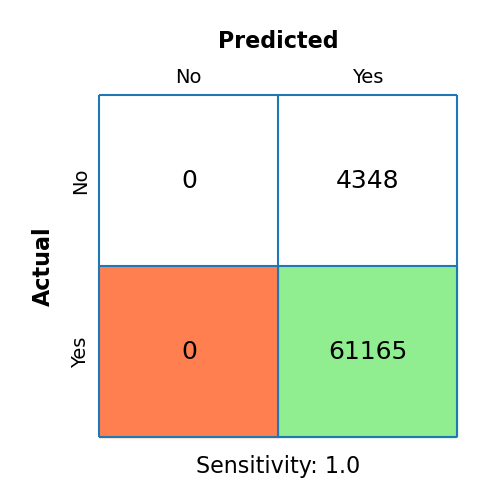

In [23]:
plot_confusion_matrix(y_test, y_pred, labels = ['No', 'Yes'], metric = 'sensitivity')

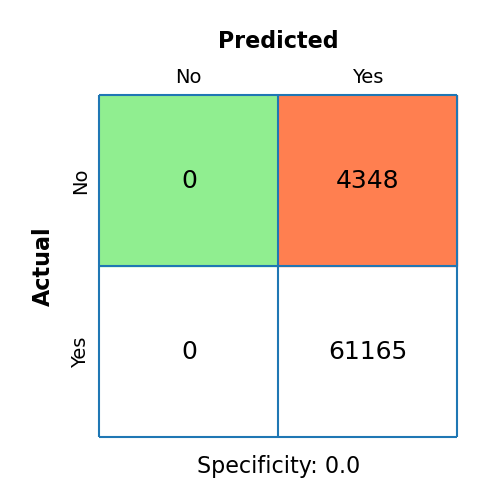

In [24]:
plot_confusion_matrix(y_test, y_pred, labels = ['No', 'Yes'], metric = 'specificity')

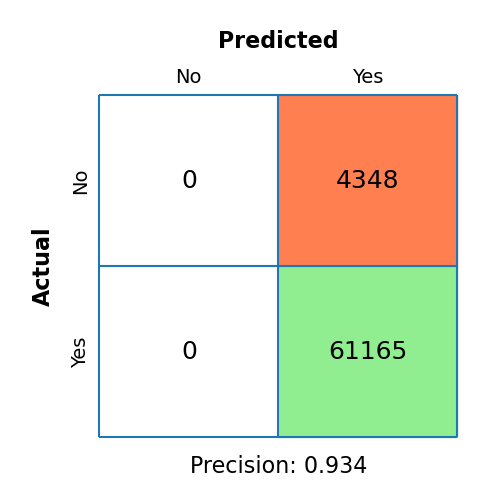

In [25]:
plot_confusion_matrix(y_test, y_pred, labels = ['No', 'Yes'], metric = 'precision')

In [28]:
y_pred_prob = logreg.predict_proba(X_test)[:,1]
y_pred_prob

array([0.94098798, 0.94098798, 0.94098798, ..., 0.94098798, 0.94098798,
       0.94098798])

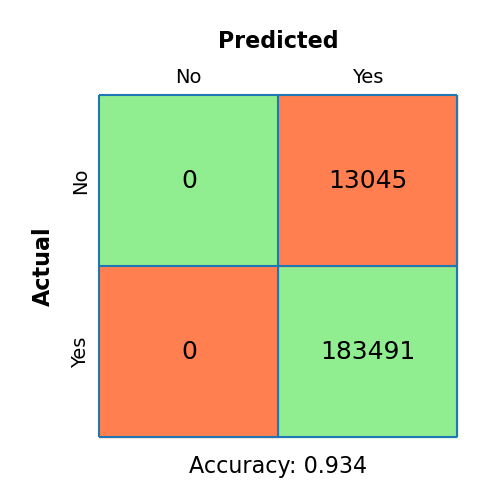

In [30]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state = 321).fit(X_train, y_train)
y_pred = tree.predict(X_test)
plot_confusion_matrix(y_train, tree.predict(X_train), labels = ['No', 'Yes'], metric = 'accuracy')

In [ ]:
####### regularization
# get the dummies and store it in a variable
brfss2 = pd.get_dummies(brfss1.HLTHPLN1)
#dummies

# Concatenate the dummies to original dataframe
merged2 = pd.concat([brfss2, dummies], axis='columns')
merged2
# drop the values


#brfss3=merged.drop(['HLTHPLN1'], axis='columns')
#brfss3
# print the dataframe
#print(merged)


In [ ]:
X = brfss1.drop(columns = ['HLTHPLN1'])
y = brfss1['HLTHPLN1']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify = y,     # Keep the same proportions of the target in the training and test data
                                                    test_size = 0.25,
                                                    random_state = 321)

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


We can see that 137 patients in our data do have a heart disease diagnosis and 160 do not.

First, let's do some exploratory analysis to see how the other variables relate to the target.

In [ ]:
#pd.crosstab(brfss['GENHLTH'], brfss['MEDCOST'])

We've got several categorical variables. In order to use these with scikit-learn models, we'll need to encode them as a number. 

To accomplish this, we can use the `get_dummies` method.

In [ ]:
categorical_variables = ['CHECKUP1']
brfss = pd.get_dummies(brfss, columns = categorical_variables)

In [ ]:
brfss.head()

In [ ]:
!pip install --upgrade category_encoders

In [ ]:
brfss.head()

In [ ]:
# encode RainToday variable

import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['CHECKUP1'])

brfss_train = encoder.fit_transform(brfss)
brfss_train
#X_test = encoder.transform(X_test)



Let's start with a simple model - predicting heart disease based on age.

In [ ]:
### scikit learn likes data frame to be in double bracket
X = brfss_train['GENHLTH']                # Predictor variable (as a DataFrame)
y = brfss_train['target']                   # Target

The main objective is to have a model which makes good predictions on _unseen_ data. Therefore, in order to evaluate how good a model is, it is necessary to set aside some data as a test set for evaulation purposes. This can be accomplished using the `train_test_split` function.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify = y,     # Keep the same proportions of the target in the training and test data
                                                    test_size = 0.25,
                                                    random_state = 321)

In [ ]:
X_test

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression()         # Create a logistic regression model
logreg.fit(X_train, y_train)          # Fit it to the training data

To understand the model, we can look at its coefficients.

In [ ]:
logreg.intercept_

In [ ]:
logreg.coef_

In [ ]:
y_pred_prob = logreg.predict_proba(X_test)[:,1]

In [ ]:
y_pred_prob

In [ ]:
i = 10 ### row number

print('Patient Information:\n{}'.format(X_test.iloc[i]))
print('---------------------------------')
print('Predicted Probability of Heart Disease: {}'.format(y_pred_prob[i]))
print('Actual: {}'.format(y_test.iloc[i]))

One way to analyze your model is to look at the receiver operating characteristic (ROC) curve. This shows how the true positive rate and false positive rate change as the prediction threshold changes.

This value can be interpreted as how likely the model is to assign a higher probability to a positive observation compared to a negative one.

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

In [ ]:
fp_rate, tp_rate, thresholds = roc_curve(y_test == 'Yes', y_pred_prob)

plt.plot(fp_rate, tp_rate)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart Disease Prediction')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

### AUC - percentage of the ROC plot that is under the curve

A perfect model would have AUC = 1.

In [ ]:
roc_auc_score(y_test, y_pred_prob)

## Analyzing Predictions

To generate predictions, you can use the `predict` method of your model.

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from cm import plot_confusion_matrix

In [ ]:
y_pred = logreg.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
plot_confusion_matrix(y_test, y_pred, labels = ['No', 'Yes'])

There are a number of metrics you can use to evalute your model. 

**Accuracy:** the total proportion of predictions which are correct.

In [ ]:
plot_confusion_matrix(y_test, y_pred, labels = ['No', 'Yes'], metric = 'accuracy')

**Sensitivity/True Positive Rate:** The proportion of true positives (in our case, people who survived) that are identified as such.

In [ ]:
plot_confusion_matrix(y_test, y_pred, labels = ['No', 'Yes'], metric = 'sensitivity')

**Specificity/True Negative Rate:** The proportion of true negatives (in our case, people who died) that are identified as such.

In [ ]:
plot_confusion_matrix(y_test, y_pred, labels = ['No', 'Yes'], metric = 'specificity')

**Precision:** The proportion of predicted positives that are actually positive (survived).

In [ ]:
plot_confusion_matrix(y_test, y_pred, labels = ['No', 'Yes'], metric = 'precision')

We have only used a single predictor in the above model. Let's see if we can improve our model by using the rest of the predictors.

In [ ]:
X = heart.drop(columns = ['AHD'])
y = heart['AHD']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify = y,     # Keep the same proportions of the target in the training and test data
                                                    test_size = 0.25,
                                                    random_state = 321)

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

With so many predictors, it takes longer for the coefficients to converge. Let's increase the number of iterations.

In [ ]:
logreg = LogisticRegression(max_iter = 10000)
logreg.fit(X_train, y_train)

Let's take a look at the coefficients.

**Caution:** Our variables are on vastly different scales, so do not interpret the value of a coefficient as the importance.

In [ ]:
coefficients = pd.DataFrame({
    'variable': X.columns,
    'coefficient': logreg.coef_[0]
})

In [ ]:
fig, ax = plt.subplots(figsize = (7,5))
sns.barplot(data = coefficients,
            x = 'coefficient', 
            y = 'variable', 
            ax = ax, 
            edgecolor = 'black')
plt.title('Logistic Regression Coefficients')

ymin, ymax = plt.ylim()
plt.vlines(x = 0, ymin = ymin, ymax = ymax);

Let's compare how our predictions change now that we are using all of the features.

In [ ]:
y_pred_prob_all = logreg.predict_proba(X_test)[:,1]

In [ ]:
i = 12

print('Patient Information:\n{}'.format(X_test.iloc[i]))
print('---------------------------------')
print('Old Predicted Probability: {}'.format(y_pred_prob[i]))
print('New Predicted Probability: {}'.format(y_pred_prob_all[i]))
print('Actual: {}'.format(y_test.iloc[i]))

Now, let's look at the ROC curve and score.

In [ ]:
fp_rate, tp_rate, thresholds = roc_curve(y_test == 'Yes', y_pred_prob_all)

plt.plot(fp_rate, tp_rate)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart Disease Prediction')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [ ]:
roc_auc_score(y_test, y_pred_prob_all)

Finally, let's look at the new accuracy score.

In [ ]:
y_pred = logreg.predict(X_test)

plot_confusion_matrix(y_test, y_pred, labels = ['No', 'Yes'], metric = 'accuracy')